### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [4]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [5]:
faturamento_total = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

In [6]:
print("Faturamento total por loja:")
print(faturamento_total)

Faturamento total por loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


# 2. Vendas por Categoria


In [7]:
vendas_por_categoria = df.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)

In [8]:
print("\nVendas por Categoria:")
print(vendas_por_categoria)


Vendas por Categoria:
Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [9]:
media_avaliacao = df.groupby('Loja')["Avaliação da compra"].mean().sort_values(ascending=False)

In [10]:
print("\nMédia de Avaliação por Loja:")
print(media_avaliacao.round(2))


Média de Avaliação por Loja:
Loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [11]:
produtos_vendidos = df.groupby("Produto")["Preço"].sum().sort_values(ascending=False)

In [12]:
# Produto mais vendido
print("\n Produtos mais vendidos:")
print(produtos_vendidos.head(10))  # Top 10


 Produtos mais vendidos:
Produto
TV Led UHD 4K         576652.70
Celular Plus X42      534735.14
Geladeira             513249.34
Smart TV              386963.12
Lavadora de roupas    323292.37
Lava louças           320715.58
Tablet ABXY           292016.76
Secadora de roupas    280317.31
Celular ABXY          210547.77
Bateria               197074.45
Name: Preço, dtype: float64


In [13]:
# Produto menos vendido
print("\n Produtos menos vendidos:")
print(produtos_vendidos.tail(10))  # Bottom 10


 Produtos menos vendidos:
Produto
Boneca bebê                11456.05
Faqueiro                   11413.85
Copo térmico               11329.84
Blocos de montar            9069.86
Dashboards com Power BI     8557.88
Jogo de copos               7445.28
Xadrez de madeira           6865.90
Dinossauro Rex              4150.53
Corda de pular              4090.93
Cubo mágico 8x8             3638.68
Name: Preço, dtype: float64


# 5. Frete Médio por Loja


In [14]:
frete_medio = df.groupby('Loja')["Frete"].mean().round(2).sort_values(ascending=False)

In [15]:
# Exibindo resultado
print("\n Frete médio por loja:")
print(frete_medio)


 Frete médio por loja:
Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


In [17]:
import matplotlib.pyplot as plt

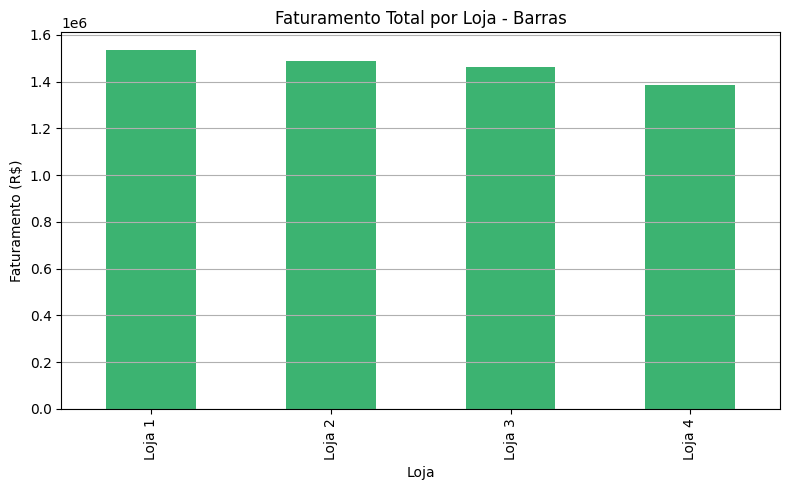

In [18]:
# ========== GRÁFICO DE BARRAS ==========
plt.figure(figsize=(8, 5))
faturamento_total.plot(kind='bar', color='mediumseagreen')
plt.title("Faturamento Total por Loja - Barras")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


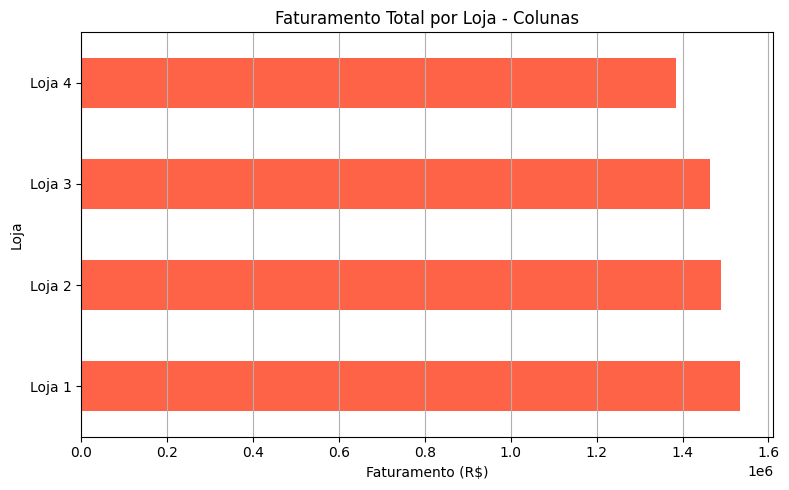

In [19]:
# ========== GRÁFICO DE COLUNAS ==========
plt.figure(figsize=(8, 5))
faturamento_total.plot(kind='barh', color='tomato')
plt.title("Faturamento Total por Loja - Colunas")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Loja")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


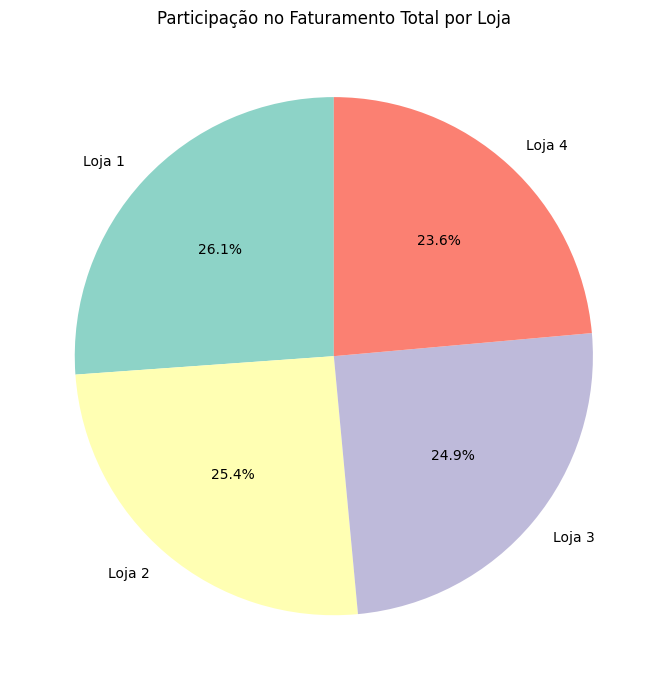

In [20]:
# ========== GRÁFICO DE PIZZA ==========
plt.figure(figsize=(7, 7))
faturamento_total.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Participação no Faturamento Total por Loja")
plt.ylabel("")  # Remove o label lateral
plt.tight_layout()
plt.show()

## Relatório

Diante das métricas e gráficos apresentados a loja ideal para colocar a venda seria a loja 1  visto que possui Faturamento mais alto, Forte presença em categoria populares, Bom histórico de vendas, Avaliação boa e consistente, Produtos com alta rotatividade, Frete competitivo.
Diante desse contexto, a Loja 1 tem os melhores indicadores de performance, reputação e atratividade de mercado. Colocá-la à venda aumentaria as chances de atrair um comprador interessado, com base em resultados concretos e escaláveis.

